In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
phone_control = 837/1032128
fitness_control = 880/1937021
headphones_control = 20643/1453092


phones_true_sales_count = 30000 * (1-phone_control)
fitness_true_sales_count = 24000 * (1-fitness_control)
headphones_true_sales_count = 120000 * (1 - headphones_control)

print(phone_control)
print(fitness_control)
print(headphones_control)

0.0008109459291870775
0.00045430586452082863
0.014206258103409832


In [7]:
import pandas as pd
import numpy as np

d = {'Audience': ['E', 'E','E','C','C','C'], 'prod_cat': ['Phones', 'Fitness Trackers', 'Headphones','Phones', 'Fitness Trackers', 'Headphones'], 'ROAS Target %':[200, 300, 150, 200, 300, 150], 'Media_Spend':[2000000, 1000000, 500000, 100000, 100000, 100000], 'Reached_Audience':[22183662,15723002,8365110,1032128,1937012,1453092], 'CPM': [11,16,17,10,19,15], 'Sales': [30000,24000,120000,837,880,20643], 'ind_sale_revenue':[300,250,150,300,250,150], 'Revenue':[9000000, 6000000,18000000,251100,220000,3096450]}
df = pd.DataFrame(data=d)
print(df)

  Audience          prod_cat  ROAS Target %  Media_Spend  Reached_Audience  \
0        E            Phones            200      2000000          22183662   
1        E  Fitness Trackers            300      1000000          15723002   
2        E        Headphones            150       500000           8365110   
3        C            Phones            200       100000           1032128   
4        C  Fitness Trackers            300       100000           1937012   
5        C        Headphones            150       100000           1453092   

   CPM   Sales  ind_sale_revenue   Revenue  
0   11   30000               300   9000000  
1   16   24000               250   6000000  
2   17  120000               150  18000000  
3   10     837               300    251100  
4   19     880               250    220000  
5   15   20643               150   3096450  


In [102]:
percent_converted_anyway = pd.DataFrame(data=((df['Sales']/df['Reached_Audience'])))
percent_converted_anyway = percent_converted_anyway[3:].reset_index(drop=True)
percent_converted_anyway

,0
0,0.000811
1,0.000454
2,0.014206


In [103]:
exposed = df[df['Audience'] == 'E']


,Audience,prod_cat,ROAS Target %,Media_Spend,Reached_Audience,CPM,Sales,ind_sale_revenue,Revenue
0,E,Phones,200,2000000,22183662,11,30000,300,9000000
1,E,Fitness Trackers,300,1000000,15723002,16,24000,250,6000000
2,E,Headphones,150,500000,8365110,17,120000,150,18000000


In [104]:
exp_sales = pd.DataFrame(data=exposed['Sales'])
exp_sales

,Sales
0,30000
1,24000
2,120000


In [138]:
true_sales = pd.DataFrame(data = exp_sales['Sales'] * (1 - percent_converted_anyway[0]))
true_sales = true_sales.round(0)
true_sales

#ax = sns.barplot(x=exposed['prod_cat'], y=true_sales[0])
#plt.ticklabel_format(style='plain', axis='y')
true_sales

,0
0,29976.0
1,23989.0
2,118295.0


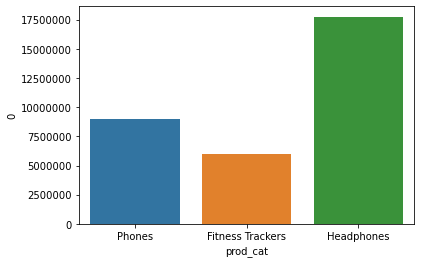

In [128]:
true_rev = pd.DataFrame(data=true_sales[0]* exposed['ind_sale_revenue'])
true_rev


ax = sns.barplot(x=exposed['prod_cat'], y=true_rev[0])
plt.ticklabel_format(style='plain', axis='y')

In [118]:
exp_media_spend = pd.DataFrame(data=exposed['Media_Spend'])

In [131]:
actualized_ROAS = true_rev[0]/exp_media_spend['Media_Spend']
actualized_ROAS = pd.DataFrame(data=actualized_ROAS * 100)
actualized_ROAS

,0
0,449.640
1,599.725
2,3548.850


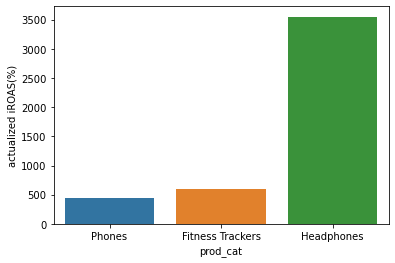

In [133]:
ax = sns.barplot(x=exposed['prod_cat'], y=actualized_ROAS[0])
plt.ticklabel_format(style='plain', axis='y')
ax.set(ylabel='actualized iROAS(%)')
plt.show()

In [134]:
3548/150

23.653333333333332

In [136]:
599/300

1.9966666666666666

In [137]:
3548/150

23.653333333333332